### Codigo para ajuste de datos NH3

**Objetivos**
1. Ajustar los datos de un sensor de bajo costo usando lecturas de un sensor calibrado como referencia.
2. Aplicar una regresión lineal (y opcionalmente polinomial).
3. Evaluar la calidad del ajuste.
4. Visualizar los resultados.
5. Predecir nuevas mediciones corregidas.

##### 1. Cargo librerías

In [47]:
import sys
!{sys.executable} -m pip install scikit-learn
import sys
!{sys.executable} -m pip install openpyxl



   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [open

In [14]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt

# Modelos de regresión y evaluación
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

##### 2. Cargo datos de ajustes

**Carga Manual**

In [ ]:
# Lecturas del sensor de bajo costo (X) y del sensor calibrado (Y)
## Datalogger = np.array([2.5, 3.0, 4.1, 5.5, 6.0, 7.2, 8.0, 9.1])
## Honeywell = np.array([2.8, 3.2, 4.3, 5.7, 6.1, 7.5, 8.2, 9.4])

**Carga desde .csv**

In [15]:
df = pd.read_csv('C:/Users/FacCsSalud/Dropbox/DoctoradoCienciasAmbientales/DatosTesis/Continuos/Python/AjusteNH3/2_ajuste_nh3.csv')
datalogger = df['Datalogger'].values
honeywell = df['Honeywell'].values

Convertimos datalogger a columna para que funcione con scikit-learn:

In [16]:
X = datalogger.reshape(-1, 1)
y = honeywell
print(X)
print(y)

[[14]
 [14]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [16]
 [15]
 [16]
 [16]
 [15]
 [16]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [15]
 [16]
 [15]
 [15]
 [16]
 [16]
 [16]
 [15]
 [16]
 [21]
 [21]
 [21]
 [20]
 [19]
 [18]
 [18]
 [17]
 [17]
 [17]
 [17]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]]
[ 7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8 12 11 12 10  9  8  8  7  7  8  8  0  0  0  0  0
  0  0  0  0  0  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5]


##### 3. Ajuste por regresión lineal

In [17]:
# Crear y entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)

# Predecir los valores corregidos
y_pred = modelo_lineal.predict(X)

# Mostrar coeficientes
print(f"Modelo ajustado: y = {modelo_lineal.coef_[0]:.4f} * x + {modelo_lineal.intercept_:.4f}")

Modelo ajustado: y = 0.3650 * x + 2.3708


##### 4. Evaluar el ajuste

In [18]:
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred)) 

print(f"R² (coeficiente de determinación): {r2:.4f}")
print(f"RMSE (error cuadrático medio): {rmse:.4f}")

R² (coeficiente de determinación): 0.7403
RMSE (error cuadrático medio): 1.3993


##### 5. Visualizar el ajuste

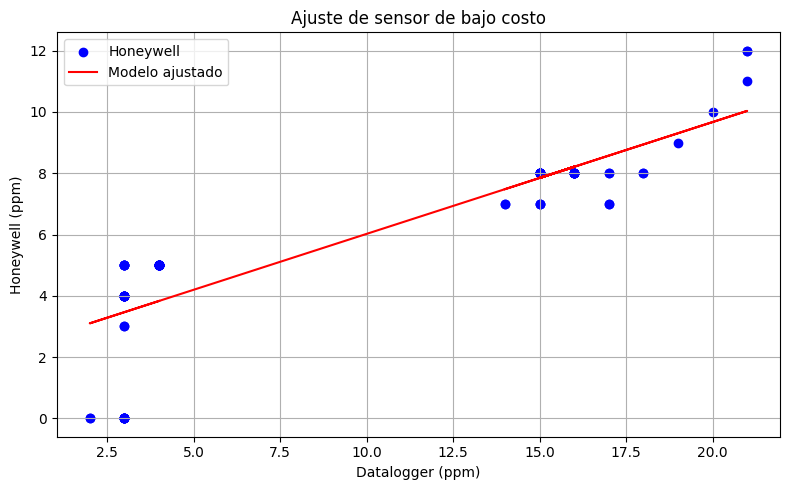

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Honeywell')
plt.plot(X, y_pred, color='red', label='Modelo ajustado')
plt.xlabel('Datalogger (ppm)')
plt.ylabel('Honeywell (ppm)')
plt.title('Ajuste de sensor de bajo costo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 6. Predecir con nuevos datos del datalogger

In [62]:
nuevas_mediciones = pd.read_csv('C:/Users/FacCsSalud/Dropbox/DoctoradoCienciasAmbientales/DatosTesis/Continuos/Python/AjusteNH3/VacioSanitario5.csv')
nuevas_mediciones = nuevas_mediciones.dropna()
nuevas_mediciones = nuevas_mediciones['Prom_NH3'].values


In [63]:
nuevas_mediciones = nuevas_mediciones.reshape(-1, 1)

In [64]:
predicciones = modelo_lineal.predict(nuevas_mediciones)

In [65]:
 for i, valor in enumerate(nuevas_mediciones.flatten()):
    print(f"datalogger: {valor:.2f} ppm -> Estimado calibrado: {predicciones[i]:.2f} ppm")

datalogger: 17.00 ppm -> Estimado calibrado: 8.58 ppm
datalogger: 16.00 ppm -> Estimado calibrado: 8.21 ppm
datalogger: 15.00 ppm -> Estimado calibrado: 7.85 ppm
datalogger: 13.00 ppm -> Estimado calibrado: 7.12 ppm
datalogger: 13.00 ppm -> Estimado calibrado: 7.12 ppm
datalogger: 18.00 ppm -> Estimado calibrado: 8.94 ppm
datalogger: 22.00 ppm -> Estimado calibrado: 10.40 ppm
datalogger: 22.00 ppm -> Estimado calibrado: 10.40 ppm
datalogger: 20.00 ppm -> Estimado calibrado: 9.67 ppm
datalogger: 17.00 ppm -> Estimado calibrado: 8.58 ppm
datalogger: 17.00 ppm -> Estimado calibrado: 8.58 ppm
datalogger: 16.00 ppm -> Estimado calibrado: 8.21 ppm
datalogger: 17.00 ppm -> Estimado calibrado: 8.58 ppm
datalogger: 22.00 ppm -> Estimado calibrado: 10.40 ppm
datalogger: 14.00 ppm -> Estimado calibrado: 7.48 ppm
datalogger: 16.00 ppm -> Estimado calibrado: 8.21 ppm
datalogger: 26.00 ppm -> Estimado calibrado: 11.86 ppm
datalogger: 22.00 ppm -> Estimado calibrado: 10.40 ppm
datalogger: 18.00 ppm -

**Añadir predicciones corregidad al archivo original**

In [66]:
predicciones = predicciones.reshape(-1, 1)

In [67]:
predicciones

array([[8.57551149],
       [8.21052988],
       [7.84554826],
       ...,
       [3.10078726],
       [3.10078726],
       [3.10078726]], shape=(1940, 1))

Reviso el rango de datos estimados, (para evaluar el error cuadrático medio)

In [68]:
print(predicciones.min(), predicciones.max())

2.370824028332316 23.174776116036192


Cargo el archivo original nurvamente para añadirle la columna de predicciones

In [30]:
import pandas as pd

In [34]:
AjustadosVS5 = pd.read_csv('C:/Users/FacCsSalud/Dropbox/DoctoradoCienciasAmbientales/DatosTesis/Continuos/Python/AjusteNH3/VacioSanitario5.csv')
AjustadosVS5 = AjustadosVS5.dropna()

Reviso cantidad de filas de cada uno para verificar que coincidan

In [35]:
len(predicciones)

1940

In [41]:
len(AjustadosVS5)

1940

Añadir columna de predicciones al archivo original

In [42]:
AjustadosVS5['NH3_Pred']=predicciones

Guardar como excel, porque al guardar como .csv no me quedaban bien los decimales

In [48]:
AjustadosVS5.to_excel('C:/Users/FacCsSalud/Dropbox/DoctoradoCienciasAmbientales/DatosTesis/Continuos/Python/AjusteNH3/AjustadosVS5.xlsx', index=False)

En el directorio indicado se agregará el archivo excel correspondiente con la nueva columna

Ahora pruebo esto para ver el rango de los datos estimados

In [49]:
print(AjustadosVS5['NH3_Pred'].min(), AjustadosVS5['NH3_Pred'].max())

2.370824028332316 23.174776116036192


##### 7. Ajuste polinomial por si el modelo lineal no es suficiente

In [50]:
# Ajuste polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

modelo_poli = LinearRegression()
modelo_poli.fit(X_poly, y)

# Predicción
y_poly_pred = modelo_poli.predict(X_poly)

# Evaluación
r2_poly = r2_score(y, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y, y_poly_pred))

print(f"Modelo polinomial (grado 2) R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")

Modelo polinomial (grado 2) R²: 0.7404, RMSE: 1.3991


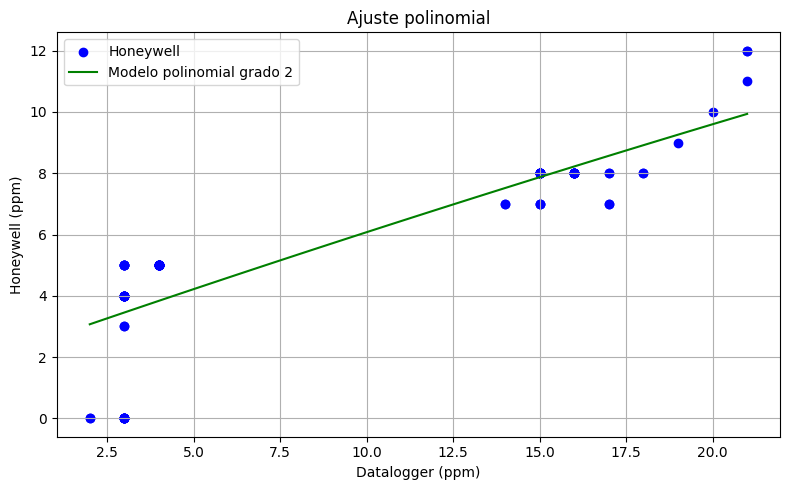

In [51]:
# Visualización
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = modelo_poli.predict(X_range_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Honeywell')
plt.plot(X_range, y_range_pred, color='green', label='Modelo polinomial grado 2')
plt.xlabel('Datalogger (ppm)')
plt.ylabel('Honeywell (ppm)')
plt.title('Ajuste polinomial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Prediccion

In [59]:
nuevas_mediciones = pd.read_csv('C:/Users/FacCsSalud/Dropbox/DoctoradoCienciasAmbientales/DatosTesis/Continuos/Python/AjusteNH3/VacioSanitario5.csv')
nuevas_mediciones = nuevas_mediciones.dropna()
nuevas_mediciones = nuevas_mediciones['Prom_NH3'].values

In [60]:
nuevas_mediciones = nuevas_mediciones.reshape(-1, 1)

In [61]:
predicciones = modelo_poli.predict(nuevas_mediciones)

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.